<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

<b>Evolution of Threat</b>

This section focusses on Climate Change.

In [33]:
# Import packages
import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# The Natural Language Toolkit (NLTK) will be used for pre-processing and text analysis.
import nltk

nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')    

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize

[nltk_data] Downloading package wordnet to /Users/silvia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silvia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/silvia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/silvia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Import UN speeches data (Lab 3)
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding = 'utf8')
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([filename[:-4],session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['id','Session','Year','ISO-alpha3 Code','Speech'])
df_speech.head()

,id,Session,Year,ISO-alpha3 Code,Speech
0,AUT_25_1970,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
1,MEX_25_1970,25,1970,MEX,"33.\t Mr. President, I take great pleasure in..."
2,COG_25_1970,25,1970,COG,122.\t I cannot begin my intervention without...
3,DZA_25_1970,25,1970,DZA,1. The delegation of Algeria is very pleased ...
4,LKA_25_1970,25,1970,LKA,"176.\t Mr. President, the delegation of Ceylon..."


In [3]:
######## To Lizzy
######## HERE SOME STUFF WENT WRONG WITH THE MERGING
######## I'm commenting some of your lines of code, line 12-13,
######## as that's where stuff went wrong, then fixing it in the cell below.
######## If you can't see line numbers, click to the left of the cell,
######## anywhere below the "run" button, then hit "L"

# Import UNSD Methodology (general info about countries taking part in the UNSD)
df_codes = pd.read_csv('UNSD — Methodology.csv') # there are 249 codes
df_codes.head()

#Combine the UN speech DataFrame with Methodology DataFrame
# df = df_speech.merge(df_codes, on="ISO-alpha3 Code", how="left") # A left join is used as we want the data to be joined for every row
# df.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN,Developing
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing


In [4]:
# Clean df_codes

# Add alpha2 code for Namibia (NA, NAM)
df_codes.loc[df_codes["ISO-alpha3 Code"]=="NAM","ISO-alpha2 Code"] = "NA"

# Fix missing values for region columns
df_codes.loc[df_codes["Intermediate Region Code"].isna(),"Intermediate Region Code"] = "#"
df_codes.loc[df_codes["Intermediate Region Name"].isna(),"Intermediate Region Name"] = "No Region"

# Fix missing values for non-binary columns
df_codes["Least Developed Countries (LDC)"] = df_codes["Least Developed Countries (LDC)"].apply(lambda x: 1 if x=="x" else 0)
df_codes["Land Locked Developing Countries (LLDC)"] = df_codes["Land Locked Developing Countries (LLDC)"].apply(lambda x: 1 if x=="x" else 0)
df_codes["Small Island Developing States (SIDS)"] = df_codes["Small Island Developing States (SIDS)"].apply(lambda x: 1 if x=="x" else 0)

# Check for missing values - the 1s refer to Antarctica
display(df_codes.isna().sum())

Global Code                                0
Global Name                                0
Region Code                                1
Region Name                                1
Sub-region Code                            1
Sub-region Name                            1
Intermediate Region Code                   0
Intermediate Region Name                   0
Country or Area                            0
M49 Code                                   0
ISO-alpha2 Code                            1
ISO-alpha3 Code                            1
Least Developed Countries (LDC)            0
Land Locked Developing Countries (LLDC)    0
Small Island Developing States (SIDS)      0
Developed / Developing Countries           1
dtype: int64

In [5]:
###### Unused dataframe

# Add a column with country names
# Import data file that contains country names and ISO codes
iso = pd.read_csv('country_ISO.csv')

# Rename column headers
rename_iso = {'Name': 'CountryName', 'Code': 'ISO-alpha2 Code'}
iso.rename(columns=rename_iso, inplace=True)

# Fill in missing values
iso.loc[iso['CountryName']=='Namibia','ISO-alpha2 Code'] = 'NA'

# Check for any missing values left
display(iso[iso["ISO-alpha2 Code"].isna()])

iso.head()

,CountryName,ISO-alpha2 Code


,CountryName,ISO-alpha2 Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [6]:
###### New code

# Display the ISO codes in df_speech that are not in df_codes, as well as their frequencies in df_values
# when merging, the rows with these ISO codes will have NaNs for all df_codes columns
# that's why the descrepancies.
print("\nMissing codes:\n")
missing_codes = df_speech[~df_speech["ISO-alpha3 Code"].isin(df_codes["ISO-alpha3 Code"].unique())]["ISO-alpha3 Code"].value_counts()
display(missing_codes)

print("\nThis is what the rows with those ISOs look like after merging:\n")
df_wrong_merge = df_speech.merge(df_codes, on="ISO-alpha3 Code", how="left")
display(df_wrong_merge[df_wrong_merge["ISO-alpha3 Code"].isin(missing_codes.index)].head())


Missing codes:



YUG     27
CSK     22
YDYE    19
DDR     18
EU      10
POR      1
Name: ISO-alpha3 Code, dtype: int64


This is what the rows with those ISOs look like after merging:



,id,Session,Year,ISO-alpha3 Code,Speech,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
33,YUG_25_1970,25,1970,YUG,"81.\t Mr. President, I should like to address...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,YDYE_26_1971,26,1971,YDYE,"31.\t Mr. President, may I congratulate you on...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,CSK_26_1971,26,1971,CSK,Allow me first of all to congratulate Mr. Mali...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,YUG_26_1971,26,1971,YUG,"1.\tMr. President, allow me to extend to you m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,YDYE_27_1972,27,1972,YDYE,"10 Mr. President, it gives me great pleasure t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Fixing missing ISO alpha3 codes in df_speech
df_speech["ISO-alpha3 Code"] = df_speech["ISO-alpha3 Code"].replace({"POR":"PRT"})

# Discarding YDYE (Dem Republic of Yemen, used 1971-1989) speeches as the country was absorbed into Yemen (YEM) after 1989
# Discarding DDE (used 1973-1990) as that was the old Dem Rep of Germany code (East Germany)
# Discarding CSK (used 1971-1992), then split into Czech Republic (CZ, CZE member since 1993) and Slovakia (Sk, SVK member since 1993)
# Discarding YUG (used 1970-1991) as that was split into:
    # Croatia (HR, HRV member since 1992),
    # Bosnia and Herzegovina(BA, BIH member since 1992),
    # Macedonia (MK, MKD member since 1993),
    # Slovenia (SI, SVN member since 1992),
    # Serbia and Montenegro (YUG member since 2001 to 2005)
        # In 2006 Serbia and Montenegro dissolved into two countries:
        # Serbia (RS, SRB member since 2006)
        # Montenegro (ME, MNE member since 2006)

# Clean df_speech, saving all the discarded speeches in separate dataframe
old_countries = df_speech[df_speech["ISO-alpha3 Code"].isin(["YUG","CSK","YDYE","DDR"])]

# Discard rows
df_speech = df_speech[~df_speech["ISO-alpha3 Code"].isin(["YUG","CSK","YDYE","DDR"])]


display(old_countries.head())
display(df_speech.head())

,id,Session,Year,ISO-alpha3 Code,Speech
33,YUG_25_1970,25,1970,YUG,"81.\t Mr. President, I should like to address..."
89,YDYE_26_1971,26,1971,YDYE,"31.\t Mr. President, may I congratulate you on..."
110,CSK_26_1971,26,1971,CSK,Allow me first of all to congratulate Mr. Mali...
158,YUG_26_1971,26,1971,YUG,"1.\tMr. President, allow me to extend to you m..."
216,YDYE_27_1972,27,1972,YDYE,"10 Mr. President, it gives me great pleasure t..."


,id,Session,Year,ISO-alpha3 Code,Speech
0,AUT_25_1970,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
1,MEX_25_1970,25,1970,MEX,"33.\t Mr. President, I take great pleasure in..."
2,COG_25_1970,25,1970,COG,122.\t I cannot begin my intervention without...
3,DZA_25_1970,25,1970,DZA,1. The delegation of Algeria is very pleased ...
4,LKA_25_1970,25,1970,LKA,"176.\t Mr. President, the delegation of Ceylon..."


In [8]:
# Check country code consistency
# Printed codes are not in df_codes
print([x for x in df_speech['ISO-alpha3 Code'].unique() if x not in df_codes['ISO-alpha3 Code'].unique()])

['EU']


In [9]:
# Merge
# Code 'EU' won't be discarded, but it will lead to NaN values for most of its columns
df = df_speech.merge(df_codes, on="ISO-alpha3 Code", how="left") # A left join is used as we want the data to be joined for every row
# No more country code discrepancies (196 vs 195 is due to missing EU code)
display(df.nunique())
df.head()

id                                         8395
Session                                      51
Year                                         51
ISO-alpha3 Code                             196
Speech                                     8395
Global Code                                   1
Global Name                                   1
Region Code                                   5
Region Name                                   5
Sub-region Code                              17
Sub-region Name                              17
Intermediate Region Code                      8
Intermediate Region Name                      8
Country or Area                             195
M49 Code                                    195
ISO-alpha2 Code                             195
Least Developed Countries (LDC)               2
Land Locked Developing Countries (LLDC)       2
Small Island Developing States (SIDS)         2
Developed / Developing Countries              2
dtype: int64

,id,Session,Year,ISO-alpha3 Code,Speech,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,AUT_25_1970,25,1970,AUT,155.\t May I begin by expressing to Ambassado...,1.0,World,150.0,Europe,155.0,Western Europe,#,No Region,Austria,40.0,AT,0.0,0.0,0.0,Developed
1,MEX_25_1970,25,1970,MEX,"33.\t Mr. President, I take great pleasure in...",1.0,World,19.0,Americas,419.0,Latin America and the Caribbean,13.0,Central America,Mexico,484.0,MX,0.0,0.0,0.0,Developing
2,COG_25_1970,25,1970,COG,122.\t I cannot begin my intervention without...,1.0,World,2.0,Africa,202.0,Sub-Saharan Africa,17.0,Middle Africa,Congo,178.0,CG,0.0,0.0,0.0,Developing
3,DZA_25_1970,25,1970,DZA,1. The delegation of Algeria is very pleased ...,1.0,World,2.0,Africa,15.0,Northern Africa,#,No Region,Algeria,12.0,DZ,0.0,0.0,0.0,Developing
4,LKA_25_1970,25,1970,LKA,"176.\t Mr. President, the delegation of Ceylon...",1.0,World,142.0,Asia,34.0,Southern Asia,#,No Region,Sri Lanka,144.0,LK,0.0,0.0,0.0,Developing


In [10]:
# Check for missing values, almost all belong to the EU
display(df.isna().sum())
df[df['ISO-alpha2 Code'].isna()]['ISO-alpha3 Code'].unique()
df_speech

id                                          0
Session                                     0
Year                                        0
ISO-alpha3 Code                             0
Speech                                      0
Global Code                                10
Global Name                                10
Region Code                                10
Region Name                                10
Sub-region Code                            10
Sub-region Name                            10
Intermediate Region Code                   10
Intermediate Region Name                   10
Country or Area                            10
M49 Code                                   10
ISO-alpha2 Code                            10
Least Developed Countries (LDC)            10
Land Locked Developing Countries (LLDC)    10
Small Island Developing States (SIDS)      10
Developed / Developing Countries           10
dtype: int64

,id,Session,Year,ISO-alpha3 Code,Speech
0,AUT_25_1970,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
1,MEX_25_1970,25,1970,MEX,"33.\t Mr. President, I take great pleasure in..."
2,COG_25_1970,25,1970,COG,122.\t I cannot begin my intervention without...
3,DZA_25_1970,25,1970,DZA,1. The delegation of Algeria is very pleased ...
4,LKA_25_1970,25,1970,LKA,"176.\t Mr. President, the delegation of Ceylon..."
...,...,...,...,...,...
8476,HRV_75_2020,75,2020,HRV,"Mr President, Excellencies\nAll protocol obser..."
8477,GAB_75_2020,75,2020,GAB,"Mr. President, Majesties,\nLadies and Gentleme..."
8478,MCO_75_2020,75,2020,MCO,"Mr. President of the General Assembly,\nMr. Se..."
8479,AND_75_2020,75,2020,AND,"Mr. President,\nMr. Secretary General,\nYour E..."


## Text Preprocessing

In [11]:
# Text preprocessing

# Words that do not add any meaning/value to the speech
stop_words = stopwords.words("english")
stop_words.append("whats")

# Multiple forms of words with the same meaning
lemmatizer = WordNetLemmatizer()

In [12]:
# Define method to get pos tags
# source: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

def get_wordnet_pos(tag):
    """Map POS tag to first character lemmatize() accepts"""
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag.upper(), wordnet.NOUN) # return tag, or wordnet.NOUN if a pos tag isn't found

In [13]:
# Function that cleans string (removes URLs, punctuations, numbers, multiple spaces)
# Resource used: https://monkeylearn.com/blog/text-cleaning/

def clean_string(text):                                          
    text = text.lower()                                          # Set all text to lower string
    text = re.sub("'"," ", text)                               # Remove apostrophes
    text = re.sub(r"http.*?(?=\s)", "", text)                    # Remove URL's
    text = re.sub(r"[^A-z\s]", "", text)                         # Remove punctuation and numbers
    text = re.sub(" +", " ", text)                               # Remove multiple spaces
    

    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
          
    filtered_text = [] 

    for token, pos in tags:                                    
        if token not in stop_words: # Remove stop words
            filtered_text.append(lemmatizer.lemmatize(token,get_wordnet_pos(pos))) 

    return " ".join(filtered_text)

In [14]:
# Clean "Speech" data with clean_string function
# df["Speech"] = df["Speech"].apply(lambda text: clean_string(text))
df["Speech"] = df["Speech"].apply(clean_string) # takes 835s approx
display(df)

old_countries['Speech'] = old_countries['Speech'].apply(clean_string) # takes 12s approx
display(old_countries)

,id,Session,Year,ISO-alpha3 Code,Speech,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,AUT_25_1970,25,1970,AUT,may begin expressing ambassador hambro behalf ...,1.0,World,150.0,Europe,155.0,Western Europe,#,No Region,Austria,40.0,AT,0.0,0.0,0.0,Developed
1,MEX_25_1970,25,1970,MEX,mr president take great pleasure following fin...,1.0,World,19.0,Americas,419.0,Latin America and the Caribbean,13.0,Central America,Mexico,484.0,MX,0.0,0.0,0.0,Developing
2,COG_25_1970,25,1970,COG,begin intervention without referring solemn re...,1.0,World,2.0,Africa,202.0,Sub-Saharan Africa,17.0,Middle Africa,Congo,178.0,CG,0.0,0.0,0.0,Developing
3,DZA_25_1970,25,1970,DZA,delegation algeria pleased see twentyfifth ses...,1.0,World,2.0,Africa,15.0,Northern Africa,#,No Region,Algeria,12.0,DZ,0.0,0.0,0.0,Developing
4,LKA_25_1970,25,1970,LKA,mr president delegation ceylon personally happ...,1.0,World,142.0,Asia,34.0,Southern Asia,#,No Region,Sri Lanka,144.0,LK,0.0,0.0,0.0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,HRV_75_2020,75,2020,HRV,mr president excellency protocol observed year...,1.0,World,150.0,Europe,39.0,Southern Europe,#,No Region,Croatia,191.0,HR,0.0,0.0,0.0,Developed
8391,GAB_75_2020,75,2020,GAB,mr president majesty lady gentleman head state...,1.0,World,2.0,Africa,202.0,Sub-Saharan Africa,17.0,Middle Africa,Gabon,266.0,GA,0.0,0.0,0.0,Developing
8392,MCO_75_2020,75,2020,MCO,mr president general assembly mr secretarygene...,1.0,World,150.0,Europe,155.0,Western Europe,#,No Region,Monaco,492.0,MC,0.0,0.0,0.0,Developed
8393,AND_75_2020,75,2020,AND,mr president mr secretary general excellency l...,1.0,World,150.0,Europe,39.0,Southern Europe,#,No Region,Andorra,20.0,AD,0.0,0.0,0.0,Developed


,id,Session,Year,ISO-alpha3 Code,Speech
33,YUG_25_1970,25,1970,YUG,mr president like address first word capacity ...
89,YDYE_26_1971,26,1971,YDYE,mr president may congratulate election preside...
110,CSK_26_1971,26,1971,CSK,allow first congratulate mr malik election hig...
158,YUG_26_1971,26,1971,YUG,mr president allow extend warm sincere congrat...
216,YDYE_27_1972,27,1972,YDYE,mr president give great pleasure congratulate ...
...,...,...,...,...,...
4818,YUG_56_2001,56,2001,YUG,let begin congratulating mr han seungsoo elect...
4995,YUG_57_2002,57,2002,YUG,great honour privilege first democratically el...
5042,YUG_58_2003,58,2003,YUG,honoured address first time behalf state union...
5209,YUG_59_2004,59,2004,YUG,allow outset convey greeting best wish people ...


In [15]:
# Dump clean data into CSVs
df.to_csv("clean_speech_df.csv",index=False)
# old_countries.to_csv("clean_old_countries.csv",index=False)

## Analysis and Plots

Run the imports cell, then come straight down here!

In [2]:
# Read data from CSVs
df = pd.read_csv("clean_speech_df.csv")
# Correct for NA, that's an import mistake
df.loc[df["ISO-alpha3 Code"]=="NAM","ISO-alpha2 Code"] = "NA"

In [3]:
from nltk.probability import FreqDist

# Climate oriented words
climate = df['Speech'].map(lambda text: text.count("climate")).sum()
climate_change = df['Speech'].map(lambda text: text.count("climate change")).sum()
deforestation = df['Speech'].map(lambda text: text.count("deforestation")).sum()
greenhouse = df['Speech'].map(lambda text: text.count("greenhouse")).sum()

print("Occurences of 'climate':", climate)
print("Occurences of 'climate change':", climate_change)
print("Occurences of 'deforestation':", deforestation)
print("Occurences of 'greenhouse':", greenhouse)

df_copy = df.copy()

# Show only data from 1970
df_copy[df_copy.Year==1970].loc[:,"Year":"Speech"]

# Occurences of "president" in 1970
df_copy[df_copy.Year==1970]['Speech'].map(lambda text: text.count("president")).sum()

# Occurences of "president" in Mexico
x = df_copy[df_copy["Country or Area"]=="Zimbabwe"]['Speech'].map(lambda text: text.count("climate")).sum()
print(x)



Occurences of 'climate': 12896
Occurences of 'climate change': 7952
Occurences of 'deforestation': 256
Occurences of 'greenhouse': 700
34


In [4]:
# Functions that take a word as an input
# Returns the number of occurences of that word in the speeches (filtered on year or country)
def word_occurences(word):
    occ = df['Speech'].map(lambda text: text.count(word)).sum()
    return occ

def word_occurences_year(word, year):
    occ_year = df[df.Year==year]['Speech'].map(lambda text: text.count(word)).sum()
    return occ_year

def word_occurences_country(word, country):
    occ_country = df[df["Country or Area"]==country]['Speech'].map(lambda text: text.count(word)).sum()
    return occ_country


Analysis of the word "climate"

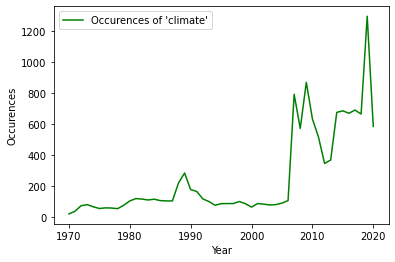

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd

# Iterate over all years and count occurences of the word
# Create a list of years and corresponding occurences of the word
rows_year = []
for y in range(1970, 2021):
    occ = word_occurences_year("climate", y)
    rows_year.append([y, occ])

# Create a DataFrame
df_year_occ = pd.DataFrame(rows_year, columns=["Year", "Occurences"])

# Plot DataFrame over years
ax_climate_y = sns.lineplot(data=df_year_occ, x="Year", y="Occurences", label="Occurences of 'climate'", color='g')

# Max and min
max_climate = df_year_occ.max()
min_climate = df_year_occ.min()
mean_climate = df_year_occ.mean()

In [19]:
years = pd.DataFrame(range(1970, 2021), columns=["Year"])
climate_count = pd.DataFrame(columns=["Year", "climate", "climate change", "global warming", "greenhous gas", "environment", "ecology", "sustainable development"],dtype=object)
climate_count = years.append(climate_count)
climate_count = climate_count.set_index("Year")

for y in climate_count.index:
    for column in climate_count:
        count = word_occurences_year(column, y)
        climate_count.at[y, column] = count

climate_count

/Users/silvia/.conda/envs/campaign_insights/lib/python3.8/site-packages/pandas/core/frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  func : function


,climate,climate change,ecology,environment,global warming,greenhous gas,sustainable development
Year,,,,,,,
1970,18,0,1,56,0,0,0
1971,35,0,1,138,0,0,0
1972,71,0,10,347,0,0,0
1973,78,1,6,133,0,0,0
1974,64,0,2,96,0,0,0
1975,53,0,0,68,0,0,0
1976,57,0,2,90,0,0,0
1977,56,0,2,58,0,0,0
1978,52,0,3,74,0,0,0


Text(0, 0.5, 'Word count')

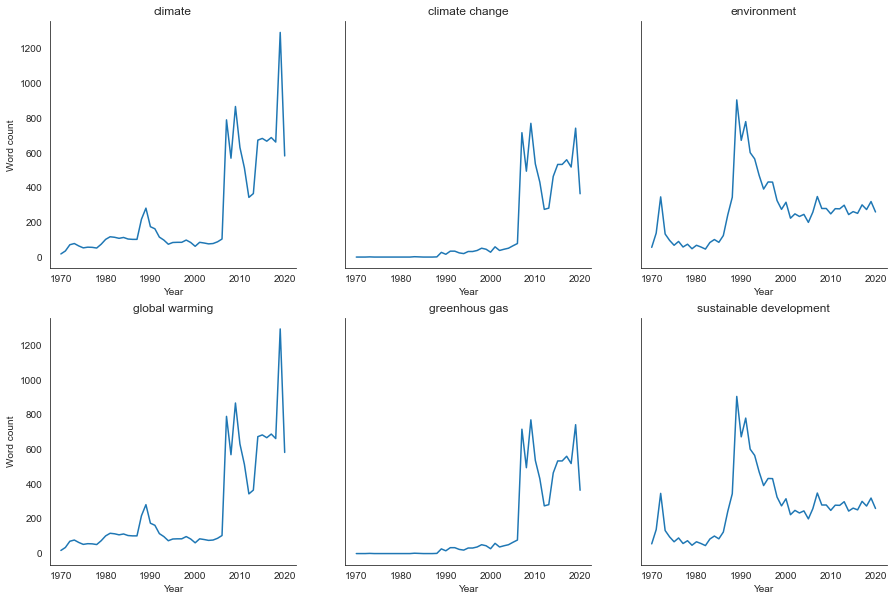

<Figure size 1440x576 with 0 Axes>

In [92]:
# Plot climate-related words
sns.set_style("white")

# climate_count = climate_count.drop("ecology",axis=1)

fig, axs = plt.subplots(2,3, figsize=(15,10), sharey=True)

columns = climate_count.columns
fig = plt.figure(figsize=(20, 8))

# for i, c in enumerate(climate_count.columns):
#     ax = plt.subplot(2,4,i+1)
#     ax.plot(climate_count[c])
#     ax.set_title(c)

for i,c in enumerate(columns[:3]):

    axs[0][i].plot(climate_count[columns[i]])
    axs[0][i].set_title(c)
    axs[0][i].set_xlabel("Year")
    axs[0][i].spines["right"].set_visible(False)
    axs[0][i].spines["top"].set_visible(False)

for i,c in enumerate(columns[3:]):

    axs[1][i].plot(climate_count[columns[i]])
    axs[1][i].set_title(c)
    axs[1][i].set_xlabel("Year")
    axs[1][i].spines["right"].set_visible(False)
    axs[1][i].spines["top"].set_visible(False)

axs[0][0].set_ylabel("Word count")
axs[1][0].set_ylabel("Word count")

# plt.legend(climate_count.columns)
# plt.xlabel("Year")
# plt.ylabel("Word count")
# fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.title("Climate-related word frequency")

In [20]:
# Iterate over all countries and count occurences of the word
# Create a list of countries and corresponding occurences of the word
rows_country = []
for c in set(df['Country or Area'].values):
    occ = word_occurences_country('climate', c)
    rows_country.append([c, occ])

# Create a DataFrame
df_country_occ = pd.DataFrame(rows_country, columns=['Country', 'Occurences'])


,Country,Occurences
76,Micronesia (Federated States of),286
88,Tuvalu,272
59,Samoa,262
168,Kiribati,201
145,Dominica,189


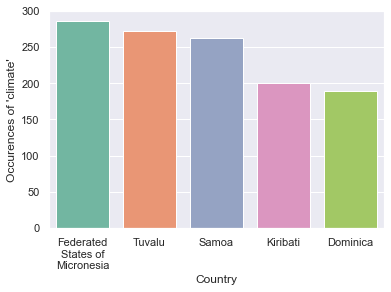

In [21]:
# Plot top 5 countries
df_country_occ_top = df_country_occ.sort_values(by=['Occurences'], ascending=False).head(5)
display(df_country_occ_top)
ax_climate_ctop = sns.barplot(data=df_country_occ_top, x="Country", y="Occurences", palette="Set2")
ax_climate_ctop.set_xlabel("Country")
ax_climate_ctop.set_ylabel("Occurences of 'climate'")
plt.xticks(rotation = 0)

ax_climate_ctop.set_xticklabels(["Federated\nStates of\nMicronesia","Tuvalu","Samoa","Kiribati","Dominica"])

plt.show()

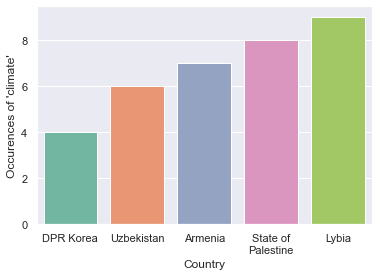

In [22]:
# Plot lowest 5 countries
df_country_occ_bottom = df_country_occ.sort_values(by=['Occurences'], ascending=True)[1:6]
# df_country_occ_bottom.replace("Democratic People's Republic of", "")
# display(df_country_occ.sort_values(by=['Occurences'], ascending=True)[1:6])
ax_climate_cbot = sns.barplot(data=df_country_occ_bottom, x="Country", y="Occurences", palette="Set2")
ax_climate_cbot.set_xlabel("Country")
ax_climate_cbot.set_ylabel("Occurences of 'climate'")
plt.xticks(rotation = 0)

ax_climate_cbot.set_xticklabels(["DPR Korea","Uzbekistan","Armenia","State of\nPalestine","Lybia"])

plt.show()

Analysis of the words "global warming"

<AxesSubplot:xlabel='Year', ylabel='Occurences'>

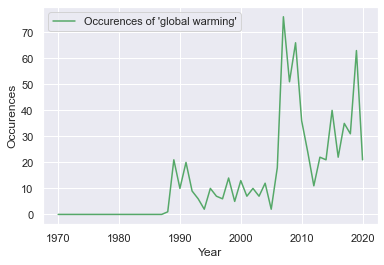

In [23]:
# Iterate over all years and count occurences of the word
# Create a list of years and corresponding occurences of the word
rows_year = []
for y in range(1970, 2021):
    occ = word_occurences_year("global warming", y)
    rows_year.append([y, occ])

# Create a DataFrame
df_year_occ_gw = pd.DataFrame(rows_year, columns=["Year", "Occurences"])

# Plot DataFrame over years
sns.set_theme()
sns.lineplot(data=df_year_occ_gw, x="Year", y="Occurences", label="Occurences of 'global warming'", color='g')

In [24]:
# Iterate over all countries and count occurences of the word
# Create a list of countries and corresponding occurences of the word
rows_country = []
for c in set(df['Country or Area'].values):
    occ = word_occurences_country('global warming', c)
    rows_country.append([c, occ])

# Create a DataFrame
df_country_occ_gw = pd.DataFrame(rows_country, columns=['Country', 'Occurences'])

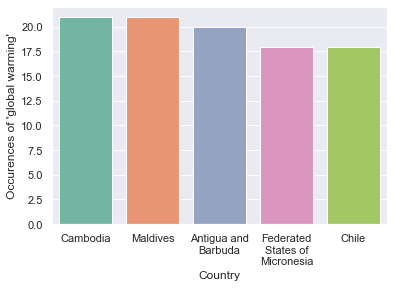

In [25]:
# Plot top 5 countries
df_country_occ_gw_top = df_country_occ_gw.sort_values(by=['Occurences'], ascending=False).head(5)
df_country_occ_gw_top
ax_gw_ctop = sns.barplot(data=df_country_occ_gw_top, x="Country", y="Occurences", palette="Set2")
ax_gw_ctop.set_xlabel("Country")
ax_gw_ctop.set_ylabel("Occurences of 'global warming'")
plt.xticks(rotation = 0)

ax_gw_ctop.set_xticklabels(["Cambodia","Maldives","Antigua and\nBarbuda","Federated\nStates of\nMicronesia","Chile"])

plt.show()

,Country,Occurences
75,Liechtenstein,1
77,Montenegro,1
79,Panama,1
81,United States of America,1
73,Albania,1


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Liechtenstein'),
  Text(1, 0, 'Montenegro'),
  Text(2, 0, 'Panama'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'Albania')])

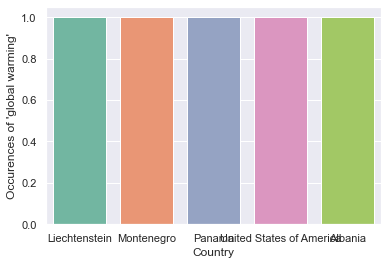

In [26]:
# Plot lowest 5 countries

### They are all zeros, so changed from 1 on

df_country_occ__gwbottom = df_country_occ_gw.sort_values(by=['Occurences'], ascending=True)
df_country_occ__gwbottom = df_country_occ__gwbottom[df_country_occ__gwbottom["Occurences"]>0].head(5)
display(df_country_occ__gwbottom)

ax_gw_cbot = sns.barplot(data=df_country_occ__gwbottom, x="Country", y="Occurences", palette="Set2")
ax_gw_cbot.set_xlabel("Country")
ax_gw_cbot.set_ylabel("Occurences of 'global warming'")
plt.xticks(rotation = 0)


# plt.show()

In [27]:
# Import data on Global Warming
df_GHG = pd.read_excel("UNdata_Export_GHG.xlsm")
rename_GHG = {'Country or Area': 'Country'}
df_GHG.rename(columns=rename_GHG, inplace=True)
df_GHG.sort_values(by="Country")

FileNotFoundError: [Errno 2] No such file or directory: 'UNdata_Export_GHG.xlsm'

In [ ]:
def GHG_country(country):
    GHG_c = df_GHG[df_GHG.Country==country]['Value'].mean()
    return GHG_c

GHG_country('France')

rows_GHG = []
for g in set(df_GHG['Country'].values):
    GHG_c = GHG_country(g)
    rows_GHG.append([g, GHG_c])

# Create a DataFrame
df_GHG_country = pd.DataFrame(rows_GHG, columns=['Country', 'GHG'])
df_GHG_country.set_index("Country")
df_GHG_country.sort_values(by='Country')

,Country,GHG
17,Australia,5.007534e+05
25,Austria,8.224036e+04
23,Belarus,9.222454e+04
4,Belgium,1.392906e+05
20,Bulgaria,6.684347e+04
8,Canada,6.945863e+05
5,Croatia,2.635900e+04
6,Cyprus,8.348411e+03
16,Czechia,1.478772e+05
0,Denmark,6.887587e+04


In [ ]:
def GHG_year(year):
    GHG_y = df_GHG[df_GHG.Year==year]['Value'].mean()
    return GHG_y

rows_GHGy = []
for y in set(df_GHG['Year'].values):
    GHG_y = GHG_year(y)
    rows_GHGy.append([y, GHG_y])

# Create a DataFrame
df_GHG_year = pd.DataFrame(rows_GHGy, columns=['Year', 'GHG'])
df_GHG_year.sort_values(by='Year')

,Year,GHG
0,1990,574390.045157
1,1991,562845.845689
2,1992,545370.219328
3,1993,537885.587483
4,1994,531686.156362
5,1995,535083.667688
6,1996,544276.249791
7,1997,538789.439437
8,1998,536257.915512
9,1999,533046.401745


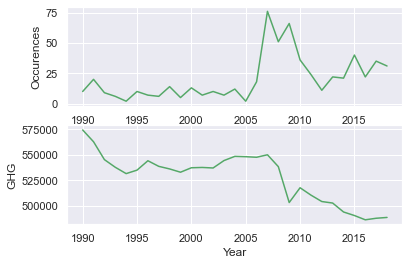

In [ ]:
# Merge GHG with occurences of 'global warming'
GHG_gw = df_year_occ_gw.merge(df_GHG_year, on="Year", how="left").sort_values(by="Year").dropna()

GHG_gw.set_index('Year')

# Plot DataFrame over years
df_year_occ_gw_slice = df_year_occ_gw
sns.set_theme()
fig, ax = plt.subplots(2, 1)
sns.lineplot(data=GHG_gw, x="Year", y="Occurences", ax=ax[0], color='g')
sns.lineplot(data=GHG_gw, x="Year", y="GHG", ax=ax[1], color='g')
plt.show()


In [ ]:
# Merge data
df_country_occ_gw.merge(df_GHG_country, on="Country", how="left").sort_values(by='Country').dropna()

,Country,Occurences,GHG
18,Australia,1,1.452185e+07
111,Austria,3,2.384971e+06
108,Belarus,1,2.674512e+06
52,Belgium,3,4.039426e+06
162,Bulgaria,1,1.938461e+06
55,Canada,1,2.014300e+07
87,Croatia,3,7.644111e+05
53,Cyprus,1,2.421039e+05
47,Denmark,2,1.997400e+06
122,Estonia,2,6.150617e+05


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'European Union'),
  Text(2, 0, 'Russian Federation'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Germany')])

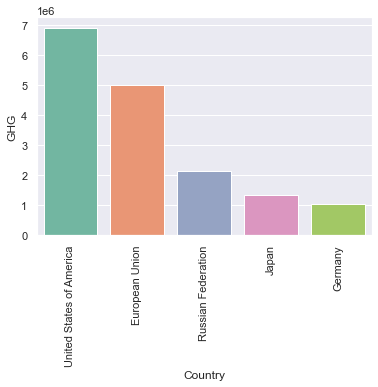

In [ ]:
# Plot top 5 countries GHG
df_country_GHG_top = df_GHG_country.sort_values(by=['GHG'], ascending=False).head(5)
df_country_GHG_top
ax_gw_ctop = sns.barplot(data=df_country_GHG_top, x="Country", y="GHG", palette="Set2")
ax_gw_ctop.set_xlabel("Country")
ax_gw_ctop.set_ylabel("GHG")
plt.xticks(rotation = 90)

In [ ]:
# Import data on Global Warming
df_Temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df_GHG.sort_values(by="Year")
df_Temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
def temp_country(country):
    temp_c = df_Temp[df_Temp.Country==country]['AverageTemperature'].sum()
    return temp_c

temp_country('France')

rows_temp = []
for g in set(df_Temp['Country'].values):
    GHG_c = GHG_country(g)
    rows_GHG.append([g, GHG_c])

print(rows_GHG)

# Create a DataFrame
df_GHG_country = pd.DataFrame(rows_GHG, columns=['Country', 'GHG'])
df_GHG_country.sort_values(by='Country')


[['Denmark', 1997400.233804148], ['Ireland', 1809040.9625498552], ['Germany', 29604997.18841582], ['New Zealand', 2170926.333565907], ['Belgium', 4039426.3116371185], ['Croatia', 764411.0734039417], ['Cyprus', 242103.93068708415], ['Monaco', 2848.620418979118], ['Canada', 20143001.90471048], ['Malta', 81025.78181218047], ['Romania', 4437102.327464314], ['Spain', 10401723.729646966], ['United Kingdom', 19321089.523415186], ['Hungary', 2076153.943714511], ['Lithuania', 694937.2509684088], ['Greece', 3336872.462743683], ['Czechia', 4288438.97492809], ['Australia', 14521847.469024427], ['Netherlands', 6195236.716558831], ['Italy', 14967587.881433666], ['Bulgaria', 1938460.731543282], ['Poland', 12138081.755088186], ['Portugal', 2076619.7850343762], ['Belarus', 2674511.7268741587], ['European Union', 145115539.59987754], ['Austria', 2384970.582410264], ['France', 15354001.927327935], ['Latvia', 379756.77130789036], ['Finland', 2035614.182794802], ['Slovenia', 548797.4640165423], ['Estonia',

,Country,GHG
215,Afghanistan,0.0
200,Africa,0.0
276,Albania,0.0
166,Algeria,0.0
212,American Samoa,0.0
...,...,...
92,Western Sahara,0.0
152,Yemen,0.0
264,Zambia,0.0
161,Zimbabwe,0.0


# Classification

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Read data from CSVs
df = pd.read_csv("clean_speech_df.csv")
# Correct for NA, that's an import mistake
df.loc[df["ISO-alpha3 Code"]=="NAM","ISO-alpha2 Code"] = "NA"

In [ ]:
#### TODO move this to cleaning
# Edit EU so that it has a region
df.loc[df["ISO-alpha3 Code"] == "EU","ISO-alpha2 Code"] = "EU"
df.loc[df["ISO-alpha3 Code"] == "EU","Sub-region Name"] = "European Union"
df.loc[df["ISO-alpha3 Code"] == "EU","Region Name"] = "Europe"

display(df.isna().sum())


id                                          0
Session                                     0
Year                                        0
ISO-alpha3 Code                             0
Speech                                      0
Global Code                                10
Global Name                                10
Region Code                                10
Region Name                                 0
Sub-region Code                            10
Sub-region Name                             0
Intermediate Region Code                   10
Intermediate Region Name                   10
Country or Area                            10
M49 Code                                   10
ISO-alpha2 Code                             0
Least Developed Countries (LDC)            10
Land Locked Developing Countries (LLDC)    10
Small Island Developing States (SIDS)      10
Developed / Developing Countries           10
dtype: int64

In [ ]:
# Get integer classes for regions
# Make dictionary
# Make target column
int_subregion_dict = {name:i for i,name in enumerate(df["Sub-region Name"].unique())}
df["int_subregion"] = df["Sub-region Name"].replace(int_subregion_dict)

In [ ]:
# Make pipeline
model = LogisticRegression(solver="saga", max_iter=1000)
pipeline = make_pipeline(TfidfVectorizer(),model)
# Use cross validation
scores = cross_val_score(pipeline, df.Speech.values, df.int_subregion.values, verbose=10, cv=3)
print(scores)
# Make a confusion matrix
# Use multinomialNB
# Use logistic regression
# Use random forest
# Sentiment analysis on developed vs developing vs least developed

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


In [ ]:
log_reg_scores = scores
np.mean(log_reg_scores), log_reg_scores

(0.9427039904705182,
 array([0.88921977, 0.95711733, 0.96009529, 0.95354378, 0.95354378]))

In [ ]:
df.int_subregion.value_counts()

2     2124
1     1547
8      795
7      517
5      493
4      441
6      438
10     437
0      378
3      302
9      211
13     166
16     136
15     120
11     102
12     102
14      76
17      10
Name: int_subregion, dtype: int64